In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('E:/Python Programs/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((334, 2), (334,), (84, 2), (84,))

## Checking if our X_features have normlly distributed data or not

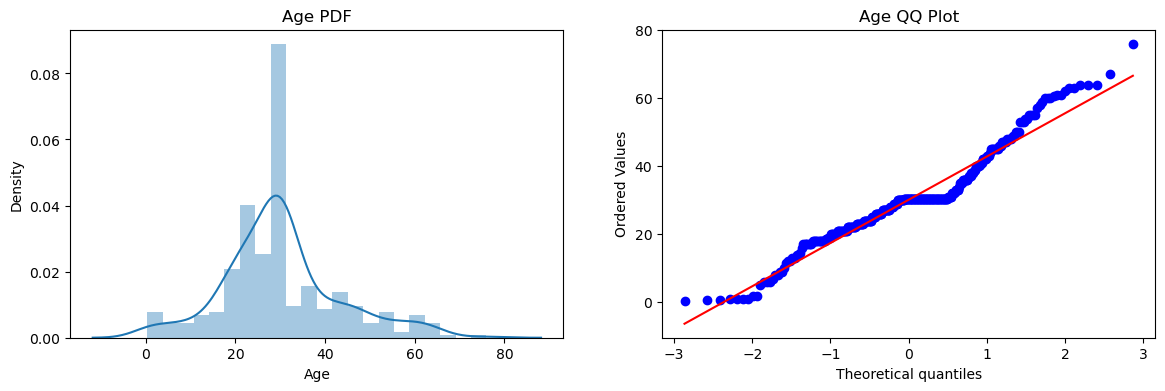

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

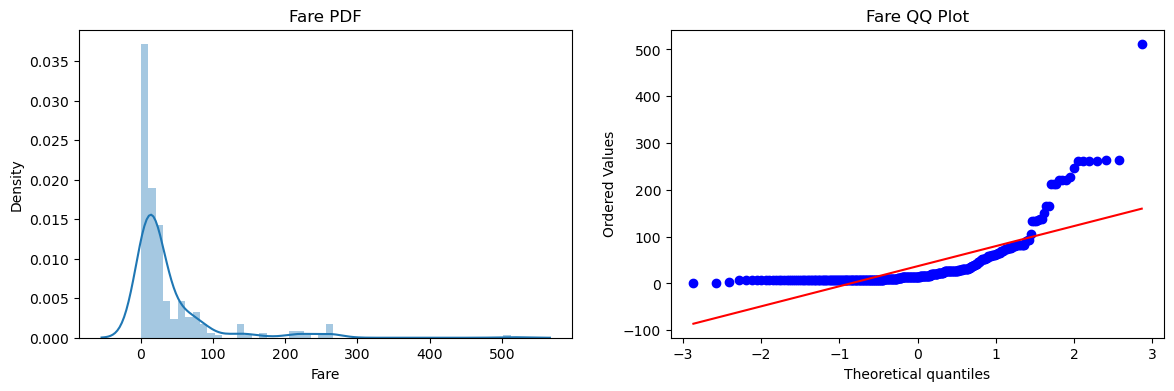

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [11]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

## Applying algorithms without Transforming

In [12]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

print("Accuracy LR: ",accuracy_score(y_test, y_pred_lr))
print("Accuracy DT: ",accuracy_score(y_test, y_pred_dt))

Accuracy LR:  0.6071428571428571
Accuracy DT:  0.5238095238095238


## Creating Function Transformer

In [13]:
trf = FunctionTransformer(func = np.log1p)

In [14]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

## Applying algorithms with Transformation

In [16]:
lr1 = LogisticRegression()
dt1 = DecisionTreeClassifier()

lr1.fit(X_train_transformed, y_train)
dt1.fit(X_train_transformed, y_train)

y_pred_lr1 = lr1.predict(X_test_transformed)
y_pred_dt1 = dt1.predict(X_test_transformed)

print("Accuracy LR: ",accuracy_score(y_test, y_pred_lr1))
print("Accuracy DT: ",accuracy_score(y_test, y_pred_dt1))

Accuracy LR:  0.6190476190476191
Accuracy DT:  0.5714285714285714


## Cross validating if this transformation is right or wrong

In [24]:
X_transformed = trf.fit_transform(X)

lr2 = LogisticRegression()
dt2 = DecisionTreeClassifier()

print("LR: ",np.mean(cross_val_score(lr2, X_transformed, y, scoring='accuracy', cv=10)))
print("DT: ",np.mean(cross_val_score(dt2, X_transformed, y, scoring='accuracy', cv=10)))

LR:  0.6556329849012775
DT:  0.5981997677119628


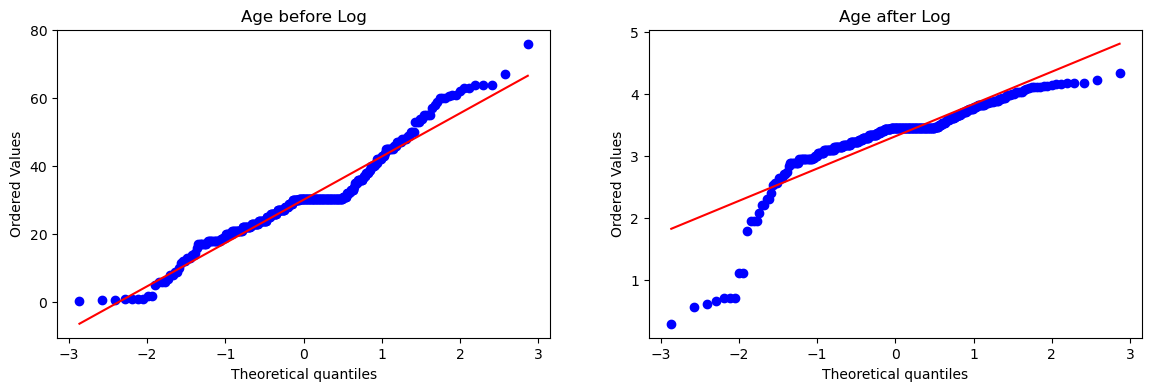

In [19]:
# Age has became worst after transformation

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age after Log')

plt.show()

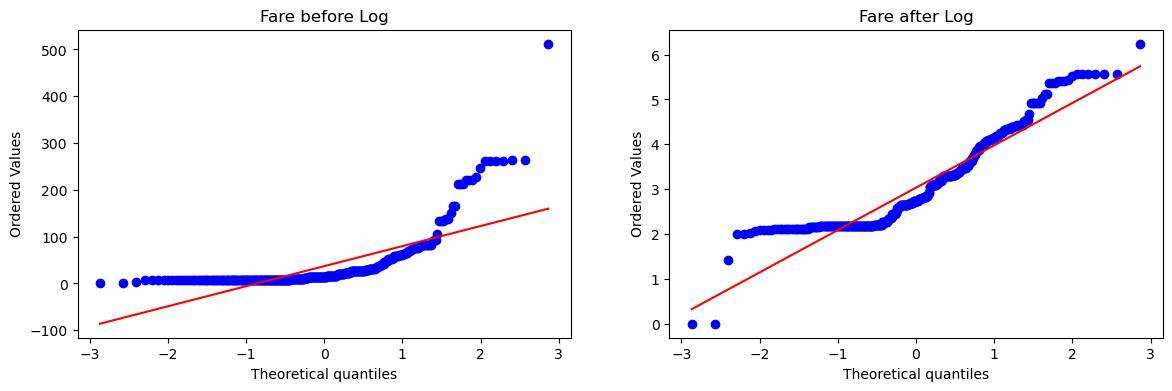

In [20]:
# Fare has became approx good after transformation

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare after Log')

plt.show()

##### Now rather than applying Log Transform on both of the columns (i.e., Age and Fare), We will only apply on Fare column

In [22]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [23]:
lr3 = LogisticRegression()
dt3 = DecisionTreeClassifier()

lr3.fit(X_train_transformed2, y_train)
dt3.fit(X_train_transformed2, y_train)

y_pred_lr3 = lr3.predict(X_test_transformed2)
y_pred_dt3 = dt3.predict(X_test_transformed2)

print("Accuracy LR: ",accuracy_score(y_test, y_pred_lr3))
print("Accuracy DT: ",accuracy_score(y_test, y_pred_dt3))

Accuracy LR:  0.6190476190476191
Accuracy DT:  0.5357142857142857


In [25]:
X_transformed2 = trf2.fit_transform(X)

lr4 = LogisticRegression()
dt4 = DecisionTreeClassifier()

print("LR: ",np.mean(cross_val_score(lr4, X_transformed2, y, scoring='accuracy', cv=10)))
print("DT: ",np.mean(cross_val_score(dt4, X_transformed2, y, scoring='accuracy', cv=10)))

LR:  0.6507549361207897
DT:  0.5884436701509872


## Remaining Transformations such as Reciprocal, Square, Square Root, Custom etc..,

In [41]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log', FunctionTransformer(transform),['Fare'])], remainder='passthrough')

    X_trans = trf.fit_transform(X)

    lr = LogisticRegression()

    print("Accuracy: ",np.mean(cross_val_score(lr, X_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.title('Fare after Transform')

    plt.show()

## Identity Function Transformer

Accuracy:  0.6483739837398372


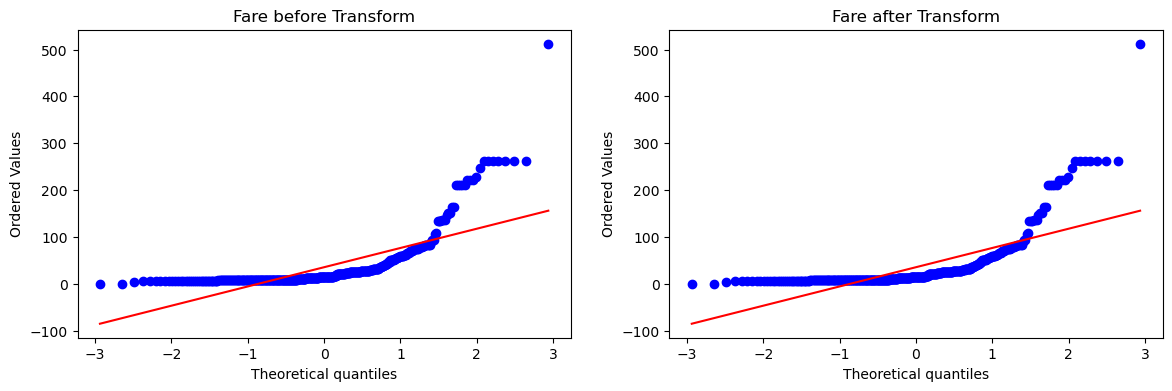

In [42]:
apply_transform(lambda x: x)

## Square Function Transformer

Accuracy:  0.6578977932636467


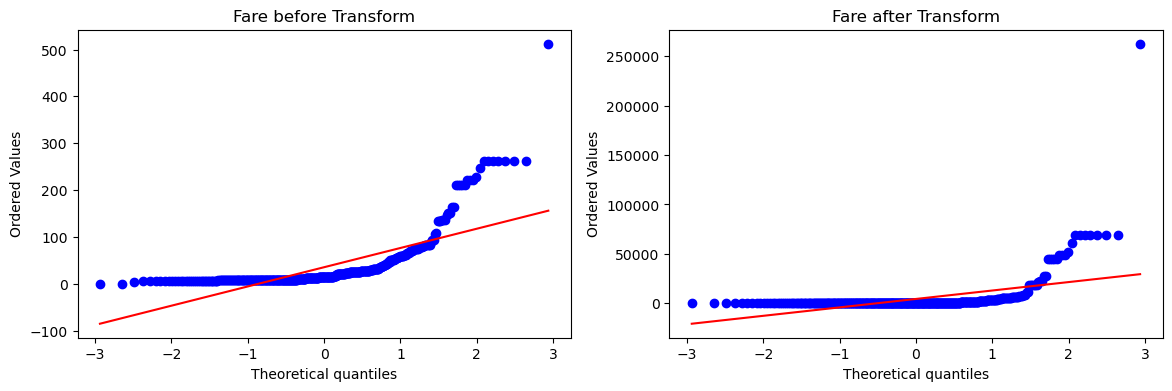

In [43]:
apply_transform(lambda x: x**2)

## Cube Function Transformer

Accuracy:  0.36846689895470386


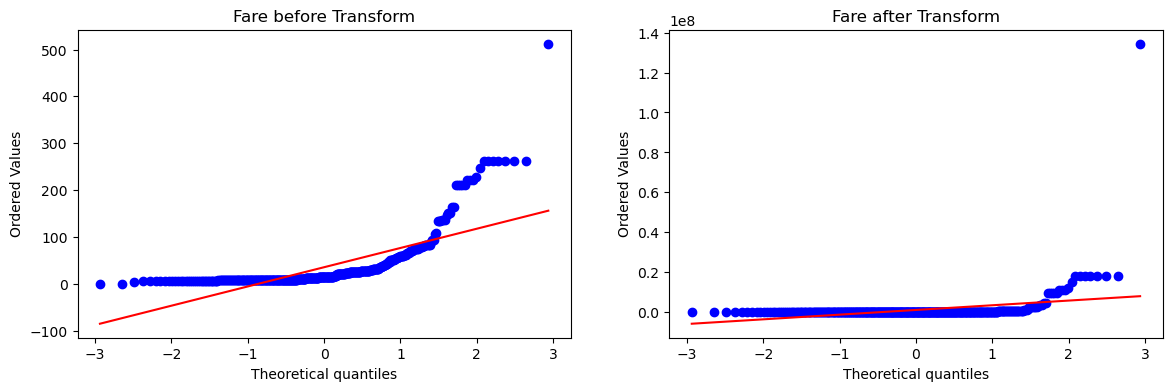

In [44]:
apply_transform(lambda x: x**3)

## Square Root Transformer

Accuracy:  0.6436120789779325


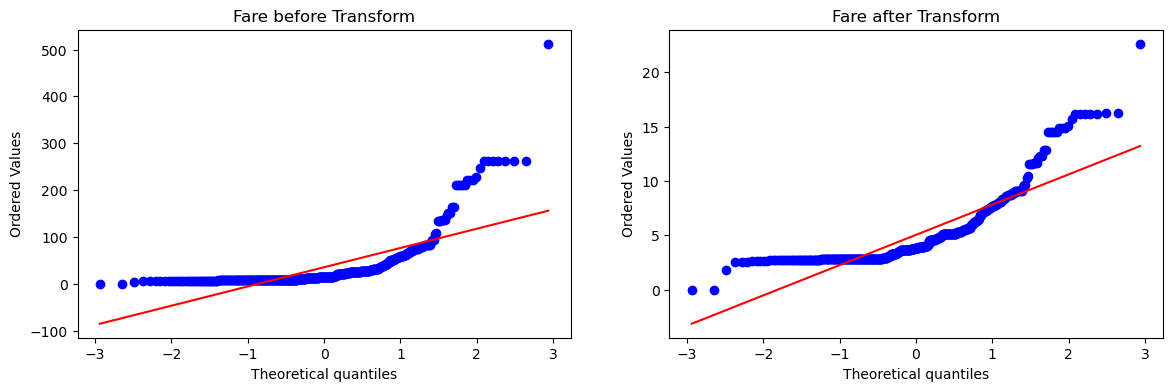

In [45]:
apply_transform(lambda x: (x**(1/2)))

## Reciprocal Transformer

Accuracy:  0.6363530778164923


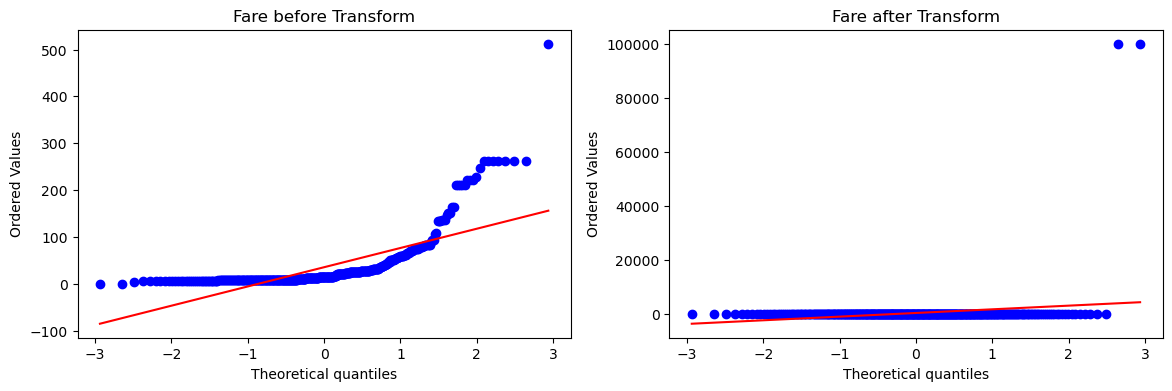

In [47]:
# 1/x may give an error if there is any zero value in your X column. Therefore we add 0.0001 value to x.

apply_transform(lambda x: 1/(x+0.00001))

## Sin theta Transformer

Accuracy:  0.6363530778164923


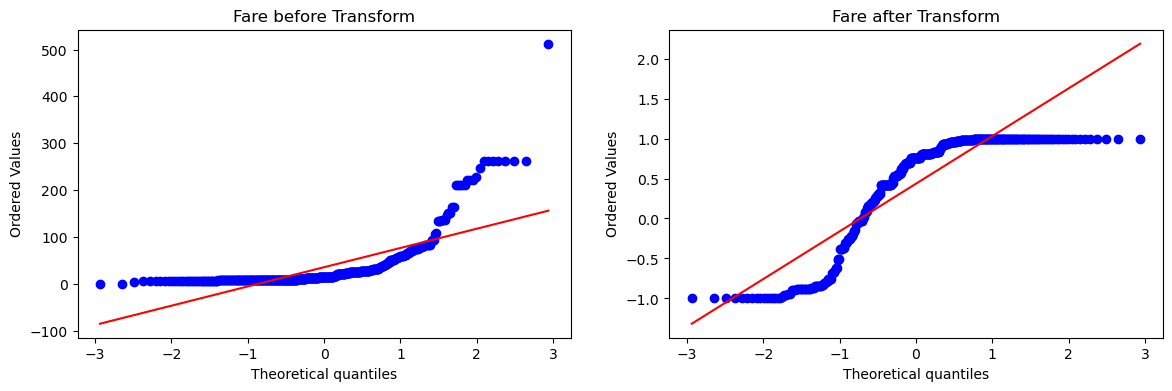

In [49]:
apply_transform(np.sin)